## Задача 10. Классификация на выбранном датасете.

In [1]:
!pip install opendatasets

Импорт модулей

In [144]:
import opendatasets as od
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Подготовка данных

Возьмем датасет wine-reviews с kaggle

In [3]:
od.download(
    "https://www.kaggle.com/datasets/zynicide/wine-reviews")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: MaxShcherbakov
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/zynicide/wine-reviews


100%|██████████| 50.9M/50.9M [00:02<00:00, 19.6MB/s]


In [145]:
wine_reviews = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv", index_col='Unnamed: 0')
wine_reviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


Так как датасет довольно большой выберем одну страну для рассмотрения.

In [146]:
wine_reviews.groupby("country")['title'].count()

,title
country,
Argentina,3800
Armenia,2
Australia,2329
Austria,3345
Bosnia and Herzegovina,2
Brazil,52
Bulgaria,141
Canada,257
Chile,4472


Наибольшее количество информации содержится о винах Америки, Франции и Италии.

Рассмотрим Италию.

In [147]:
wine_reviews = wine_reviews[wine_reviews['country'] == 'Italy']

Добавим год разлива вина. Пропущенные значения заменим медианой для сорта.

In [148]:
def unwrap_list(num_in_list):
  try:
    return num_in_list[0]
  except:
    return np.nan

In [149]:
wine_reviews['year'] = wine_reviews['title'].transform(lambda x: unwrap_list(list(filter(lambda a: a.isdigit() and len(a) == 4, x.split())))).astype(float)
wine_reviews['year'] = wine_reviews.groupby(['variety'])['year'].transform(lambda x: x.fillna(x.median()))
wine_reviews

<ipython-input-149-33f690768e06>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-149-33f690768e06>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013.0
13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte,2012.0
22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto,2007.0
24,Italy,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),Nero d'Avola,Canicattì,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129929,Italy,"This luminous sparkler has a sweet, fruit-forw...",NaN,91,38.0,Veneto,Prosecco Superiore di Cartizze,NaN,NaN,NaN,Col Vetoraz Spumanti NV Prosecco Superiore di...,Prosecco,Col Vetoraz Spumanti,2007.0
129943,Italy,"A blend of Nero d'Avola and Syrah, this convey...",Adènzia,90,29.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio del Cristo di Campobello 2012 Adènzia R...,Red Blend,Baglio del Cristo di Campobello,2012.0
129947,Italy,"A blend of 65% Cabernet Sauvignon, 30% Merlot ...",Symposio,90,20.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Feudo Principi di Butera 2012 Symposio Red (Te...,Red Blend,Feudo Principi di Butera,2012.0
129961,Italy,"Intense aromas of wild cherry, baking spice, t...",NaN,90,30.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,COS 2013 Frappato (Sicilia),Frappato,COS,2013.0


Будем пытаться предсказать сорт вина

Заметим, что некоторые сорта встречаются всего несколько раз, поэтому они могут, либо не попасть в тренировочную выборку, либо слишком сильно влиять на модель.

Удалим их и данные, которые по логике не влияют на обучение.


In [150]:
match_id_counts = wine_reviews['variety'].value_counts()
match_id_counts

,count
variety,
Red Blend,3624
Nebbiolo,2736
Sangiovese,2265
White Blend,779
Sangiovese Grosso,750
...,...
Tannat,1
Molinara,1
Vespaiolo,1


In [151]:
valid_match_ids = match_id_counts[match_id_counts >= 750].index
data = pd.DataFrame(wine_reviews[wine_reviews['variety'].isin(valid_match_ids)][['points', 'price', 'province', 'winery', 'year', 'variety']])
data['province'] = data['province'].replace({'Sicily & Sardinia' : 'Sicily and Sardinia'})
data

,points,price,province,winery,year,variety
0,87,NaN,Sicily and Sardinia,Nicosia,2013.0,White Blend
22,87,19.0,Sicily and Sardinia,Baglio di Pianetto,2007.0,White Blend
26,87,13.0,Sicily and Sardinia,Stemmari,2013.0,White Blend
28,87,17.0,Sicily and Sardinia,Terre di Giurfo,2011.0,Red Blend
31,86,NaN,Sicily and Sardinia,Duca di Salaparuta,2010.0,Red Blend
...,...,...,...,...,...,...
129826,88,50.0,Piedmont,Vinchio-Vaglio Serra,2006.0,Nebbiolo
129844,86,NaN,Tuscany,Caparzo,2006.0,Sangiovese
129892,91,72.0,Tuscany,La Mannella,2012.0,Sangiovese
129943,90,29.0,Sicily and Sardinia,Baglio del Cristo di Campobello,2012.0,Red Blend


In [152]:
data['points'] = data['points'].astype(int)
data['price'] = data['price'].astype(float)
data['province'] = data['province'].astype('category')
data['winery'] = data['winery'].astype('category')
data['variety'] = data['variety'].astype('category')

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10154 entries, 0 to 129947
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   points    10154 non-null  int64   
 1   price     8716 non-null   float64 
 2   province  10154 non-null  category
 3   winery    10154 non-null  category
 4   year      10154 non-null  float64 
 5   variety   10154 non-null  category
dtypes: category(3), float64(2), int64(1)
memory usage: 437.0 KB


Заменим NaN значения цены на средние по провинции.

In [154]:
data['price'] = data.groupby(['province'])['price'].transform(lambda x: x.fillna(x.mean()))
data.isnull().sum()

<ipython-input-154-e9db7da44e0d>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,0
points,0
price,0
province,0
winery,0
year,0
variety,0


 # Визуализация

Посмотрим на зависимость сорта винограда в зависимости от провинции и винодельни

In [155]:
fig = px.scatter(data, x='province', y='variety', title="Scatter plot: variety by province and winery")
fig.show()

Можно заметить, что в каждой провинции используются не все сорта. Значит признак будет влиять на модель.

Посмотрим на количество строк для каждого сорта.

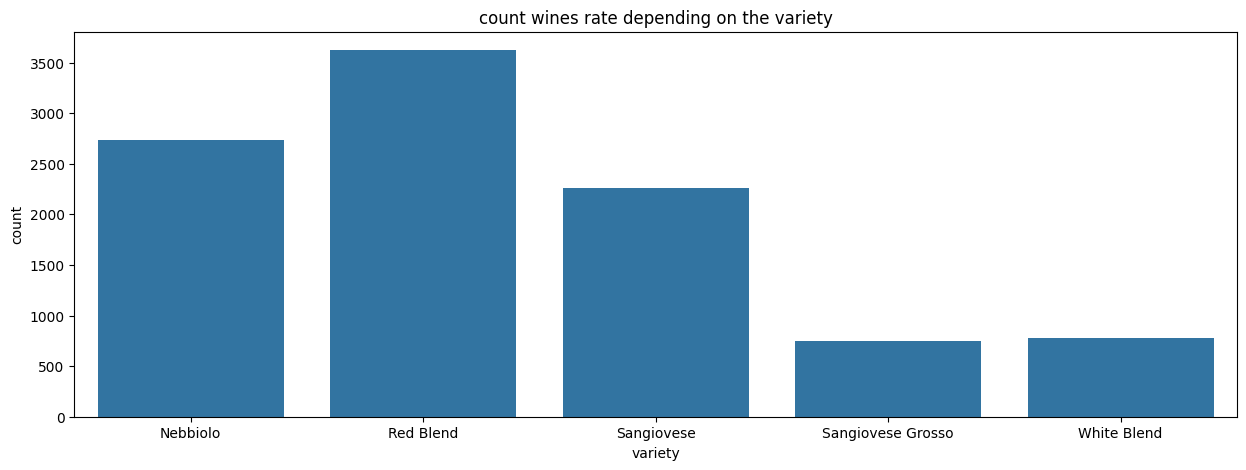

In [156]:
plt.figure(figsize=(15,5))
sns.countplot(data=data, x='variety')
plt.title("count wines rate depending on the variety")
plt.xlabel("variety")
plt.ylabel("count")
plt.show()

Заметим, что для двух сортов количество строк сильно меньше, значит, скорее всего, предсказание для них будет менее точным.

Посмотрим на количество в зависимости от оценки

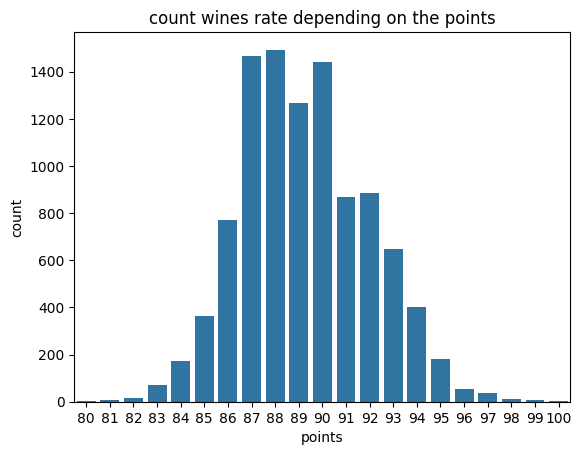

In [157]:
sns.countplot(data=data, x='points')
plt.title("count wines rate depending on the points")
plt.xlabel("points")
plt.ylabel("count")
plt.show()

Видим, что количество вин с оценкой в диапазоне 86-92 больше всего, следовательно, для них признак оценки будет меньше влиять на модель.

Проверим что оценка и стоимость вина не линейно-зависимы.

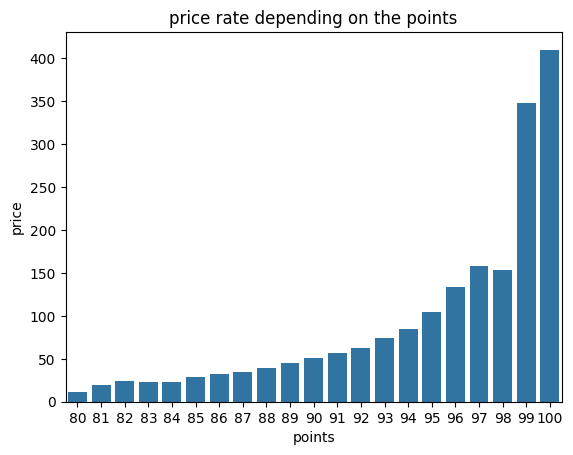

In [158]:
sns.barplot(data=data, x='points', y='price', errorbar=None)
plt.title("price rate depending on the points")
plt.xlabel("points")
plt.ylabel("price")
plt.show()

Проверили)

# Модель и обучение

In [159]:
X = data.drop(['variety'], axis=1)
Y = data['variety']

Представляем данные в виде необходимом для обучения.

In [160]:
province = pd.get_dummies(X['province'], drop_first=True)
winery = pd.get_dummies(X['winery'], drop_first=True)

X.drop(['province', 'winery'], axis=1, inplace=True)

X = pd.concat([X, province, winery], axis=1)

Разбиваем данные на тренировочные и тестовые

In [161]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train

,points,price,year,Italy Other,Lombardy,Northeastern Italy,Northwestern Italy,Piedmont,Sicily and Sardinia,Southern Italy,...,Wine for Food,Zanoni,Zenato,Zeni,Ziobaffa,Zisola,Zonin,Zuani,Zymè,Ïl Macchione
61074,88,66.589096,2008.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
21917,89,39.000000,2006.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
60226,91,60.000000,2010.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
106178,86,22.000000,2013.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73537,88,36.000000,2007.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72445,87,20.000000,2015.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65722,91,50.000000,2008.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
67968,89,40.000000,2008.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10758,94,130.000000,2005.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Сперва попробуем модель с прошлого дз с подбором параметров.

In [162]:
from sklearn.tree import DecisionTreeClassifier

# create dict with paramemeters for model
param_grid_clf = {
    'criterion': ('entropy', 'gini', 'log_loss'),
    'max_depth': [5, 10, None],
}

# create model
clf = DecisionTreeClassifier(random_state=42)

# selection of best parameters
grid_search_clf = GridSearchCV(clf, param_grid_clf, n_jobs=-1, scoring='accuracy')

# train model
grid_search_clf.fit(X_train, Y_train)

# check of best parameters
print("best parameters for DecisionTreeClassifier:", grid_search_clf.best_params_)

# prediction of results
y_pred = grid_search_clf.predict(X_test)

# check of metric values
print(classification_report(Y_test, y_pred))
print("accuracy_score:", accuracy_score(Y_test, y_pred))
print("confusion_matrix: ", confusion_matrix(Y_test, y_pred), sep='\n')

best parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': None}
                   precision    recall  f1-score   support

         Nebbiolo       0.99      0.99      0.99       556
        Red Blend       0.74      0.78      0.76       717
       Sangiovese       0.77      0.72      0.74       463
Sangiovese Grosso       0.70      0.68      0.69       149
      White Blend       0.54      0.49      0.51       146

         accuracy                           0.80      2031
        macro avg       0.75      0.73      0.74      2031
     weighted avg       0.80      0.80      0.80      2031

accuracy_score: 0.7971442639094042
confusion_matrix: 
[[552   3   0   0   1]
 [  5 561  77  21  53]
 [  0 103 333  19   8]
 [  0  37  11 101   0]
 [  3  56  12   3  72]]


Видим, что модель неплохо справляется с предсказанием. Точность модели коррелирует с количеством строк для сортов (как и у всех последующих моделей).  

Уменьшим размерность т.к. для других моделей обучение на таких данных происходит очень долго.

In [163]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

In [164]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca

array([[ 1.69257207e+01, -1.04532625e+00, -1.80761757e+00,
        -8.35908040e-01,  3.18770436e-01],
       [-1.06091125e+01, -3.20797730e+00,  4.44702637e-02,
         5.23980119e-01,  1.12954685e-01],
       [ 1.04219978e+01,  9.01748642e-01,  1.38249886e+00,
         6.06528755e-01,  4.62145774e-02],
       ...,
       [-9.62063181e+00, -1.20242797e+00,  2.07709133e-02,
         5.29624408e-01,  1.08850566e-01],
       [ 8.05083268e+01, -3.71720494e+00,  2.10435716e+00,
         7.73339449e-01, -9.44606190e-02],
       [-1.55310799e+01, -5.24403081e+00,  2.19571183e+00,
         5.41393834e-01,  8.48940338e-02]])

In [165]:
from sklearn.tree import DecisionTreeClassifier

# create dict with paramemeters for model
param_grid_clf = {
    'criterion': ('entropy', 'gini', 'log_loss'),
    'max_depth': [5, 10, None],
}
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

# create model
clf = DecisionTreeClassifier(random_state=42)

# selection of best parameters
grid_search_clf = GridSearchCV(clf, param_grid_clf, n_jobs=-1, scoring='accuracy')

# train model
grid_search_clf.fit(X_train_pca, Y_train)

# check of best parameters
print("best parameters for DecisionTreeClassifier:", grid_search_clf.best_params_)

# prediction of results
y_pred = grid_search_clf.predict(X_test_pca)

# check of metric values
print(classification_report(Y_test, y_pred))
print("accuracy_score:", accuracy_score(Y_test, y_pred))
print("confusion_matrix: ", confusion_matrix(Y_test, y_pred), sep='\n')

best parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 10}
                   precision    recall  f1-score   support

         Nebbiolo       0.96      0.98      0.97       556
        Red Blend       0.67      0.70      0.68       717
       Sangiovese       0.67      0.60      0.63       463
Sangiovese Grosso       0.62      0.69      0.65       149
      White Blend       0.48      0.40      0.43       146

         accuracy                           0.73      2031
        macro avg       0.68      0.67      0.67      2031
     weighted avg       0.73      0.73      0.73      2031

accuracy_score: 0.7331363860167405
confusion_matrix: 
[[545   7   1   0   3]
 [ 19 505 111  29  53]
 [  0 146 278  32   7]
 [  0  33  13 103   0]
 [  3  68  15   2  58]]


Видим, что после уменьшения размерности с помощью PCA модель неплохо справляется с предсказанием за исключением White Blend.

Попробуем другие модели

In [166]:
from sklearn.linear_model import SGDClassifier

# create dict with paramemeters for model
param_grid_clf = {
    'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_error'],
    'max_iter': [100, 200, 400, 800, 1000]
}

# create model
clf = SGDClassifier(random_state=42)

# selection of best parameters
grid_search_clf = GridSearchCV(clf, param_grid_clf, n_jobs=-1, scoring='accuracy')

# train model
grid_search_clf.fit(X_train_pca, Y_train)

# check of best parameters
print("best parameters for SGDClassifier:", grid_search_clf.best_params_)

# prediction of results
y_pred = grid_search_clf.predict(X_test_pca)

# check of metric values
print(classification_report(Y_test, y_pred))
print("accuracy_score:", accuracy_score(Y_test, y_pred))
print("confusion_matrix: ", confusion_matrix(Y_test, y_pred), sep='\n')

best parameters for SGDClassifier: {'loss': 'log_loss', 'max_iter': 100}
                   precision    recall  f1-score   support

         Nebbiolo       0.94      0.97      0.96       556
        Red Blend       0.51      0.46      0.48       717
       Sangiovese       0.43      0.64      0.51       463
Sangiovese Grosso       0.07      0.02      0.03       149
      White Blend       0.43      0.24      0.31       146

         accuracy                           0.59      2031
        macro avg       0.48      0.47      0.46      2031
     weighted avg       0.57      0.59      0.57      2031

accuracy_score: 0.5928114229443624
confusion_matrix: 
[[541  15   0   0   0]
 [ 24 329 313  12  39]
 [  5 127 296  27   8]
 [  1  79  66   3   0]
 [  3  90  17   1  35]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Такая модель предсказывает результаты с очень низкой точностью.

Были попытки перебирать разные параметры ядра модли SVC, но это катастрафически замедляло процесс, а результаты не становились сильно лучше, поэтому тут использую дефолтные параметры.

In [185]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train_pca, Y_train)
y_pred = clf.predict(X_test_pca)

# check of metric values
print(classification_report(Y_test, y_pred))
print("accuracy_score:", accuracy_score(Y_test, y_pred))
print("confusion_matrix: ", confusion_matrix(Y_test, y_pred), sep='\n')

                   precision    recall  f1-score   support

         Nebbiolo       0.84      0.95      0.89       556
        Red Blend       0.49      0.89      0.63       717
       Sangiovese       0.73      0.16      0.26       463
Sangiovese Grosso       0.00      0.00      0.00       149
      White Blend       0.00      0.00      0.00       146

         accuracy                           0.61      2031
        macro avg       0.41      0.40      0.36      2031
     weighted avg       0.57      0.61      0.53      2031

accuracy_score: 0.6090595765632694
confusion_matrix: 
[[526  30   0   0   0]
 [ 55 638  24   0   0]
 [ 31 353  73   6   0]
 [ 12 136   1   0   0]
 [  5 138   2   1   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Любопытно почему модель предсказывает Red Blend вместо Sangiovese, Sangiovese Grosso, White Blend. Однако результаты хуже чем у других моделей и точность очень низкая.

Попробуем другой способ уменьшения размерности.

In [168]:
tsne = TSNE(n_components=3, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)
X_train_tsne

array([[  3.6034458 ,  10.984984  , -12.17775   ],
       [ -3.9742153 ,  -3.546749  ,   3.8960083 ],
       [  8.910914  ,  -6.8849916 ,  15.423866  ],
       ...,
       [ -2.4864411 ,  -1.8727673 ,   1.9362738 ],
       [ 16.099463  ,  -0.58351797, -14.461287  ],
       [ -3.9872148 ,  -3.205076  ,  10.208549  ]], dtype=float32)

In [169]:
from sklearn.tree import DecisionTreeClassifier

# create dict with paramemeters for model
param_grid_clf = {
    'criterion': ('entropy', 'gini', 'log_loss'),
    'max_depth': [5, 10, None],
}
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

# create model
clf = DecisionTreeClassifier(random_state=42)

# selection of best parameters
grid_search_clf = GridSearchCV(clf, param_grid_clf, n_jobs=-1, scoring='accuracy')

# train model
grid_search_clf.fit(X_train_tsne, Y_train)

# check of best parameters
print("best parameters for DecisionTreeClassifier:", grid_search_clf.best_params_)

# prediction of results
y_pred = grid_search_clf.predict(X_test_tsne)

# check of metric values
print(classification_report(Y_test, y_pred))
print("accuracy_score:", accuracy_score(Y_test, y_pred))
print("confusion_matrix: ", confusion_matrix(Y_test, y_pred), sep='\n')

best parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': None}
                   precision    recall  f1-score   support

         Nebbiolo       0.37      0.43      0.40       556
        Red Blend       0.39      0.38      0.38       717
       Sangiovese       0.24      0.18      0.21       463
Sangiovese Grosso       0.06      0.06      0.06       149
      White Blend       0.06      0.06      0.06       146

         accuracy                           0.30      2031
        macro avg       0.22      0.22      0.22      2031
     weighted avg       0.30      0.30      0.30      2031

accuracy_score: 0.30280649926144754
confusion_matrix: 
[[241 159  71  68  17]
 [183 272 142  38  82]
 [141 160  84  39  39]
 [ 64  42  25   9   9]
 [ 30  69  32   6   9]]


Модель предсказывает данные с очень низкой точностью, после применения t-SNE.

In [188]:
from sklearn.linear_model import SGDClassifier

# create dict with paramemeters for model
param_grid_clf = {
    'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_error'],
    'max_iter': [100, 200, 400, 800, 1000]
}

# create model
clf = SGDClassifier(random_state=42)

# selection of best parameters
grid_search_clf = GridSearchCV(clf, param_grid_clf, n_jobs=-1, scoring='accuracy')

# train model
grid_search_clf.fit(X_train_tsne, Y_train)

# check of best parameters
print("best parameters for SGDClassifier:", grid_search_clf.best_params_)

# prediction of results
y_pred = grid_search_clf.predict(X_test_tsne)

# check of metric values
print(classification_report(Y_test, y_pred))
print("accuracy_score:", accuracy_score(Y_test, y_pred))
print("confusion_matrix: ", confusion_matrix(Y_test, y_pred), sep='\n')

best parameters for SGDClassifier: {'loss': 'modified_huber', 'max_iter': 400}
                   precision    recall  f1-score   support

         Nebbiolo       0.04      0.04      0.04       556
        Red Blend       0.18      0.12      0.14       717
       Sangiovese       0.20      0.25      0.22       463
Sangiovese Grosso       0.06      0.15      0.08       149
      White Blend       0.00      0.00      0.00       146

         accuracy                           0.12      2031
        macro avg       0.10      0.11      0.10      2031
     weighted avg       0.12      0.12      0.12      2031

accuracy_score: 0.1240768094534712
confusion_matrix: 
[[ 25 255 162 114   0]
 [280  87 247 103   0]
 [122  95 118 128   0]
 [ 50  39  38  22   0]
 [ 85  17  36   8   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



После t-SNE точность модели сильно снизилась.

In [189]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train_tsne, Y_train)
y_pred = clf.predict(X_test_tsne)

# check of metric values
print(classification_report(Y_test, y_pred))
print("accuracy_score:", accuracy_score(Y_test, y_pred))
print("confusion_matrix: ", confusion_matrix(Y_test, y_pred), sep='\n')

                   precision    recall  f1-score   support

         Nebbiolo       0.51      0.75      0.61       556
        Red Blend       0.46      0.78      0.58       717
       Sangiovese       0.00      0.00      0.00       463
Sangiovese Grosso       0.00      0.00      0.00       149
      White Blend       0.00      0.00      0.00       146

         accuracy                           0.48      2031
        macro avg       0.19      0.31      0.24      2031
     weighted avg       0.30      0.48      0.37      2031

accuracy_score: 0.48202855736090594
confusion_matrix: 
[[419 137   0   0   0]
 [157 560   0   0   0]
 [160 302   0   1   0]
 [ 65  84   0   0   0]
 [ 15 131   0   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



После t-SNE у модели осталась проблема с предсказанием Sangiovese, Sangiovese Grosso, White Blend.

Точность модели низкая.

# Вывод

С решением задачи классификации на выбранном датасате лучше всего справилась модель решающего дерева, без применения методов уменьшения размерности данных.